### 用 Python 自學資料科學與機器學習入門實戰：Scikit Learn 基礎入門
https://www.happycoder.org/2017/10/14/python-data-science-and-machine-learning-scikit-learn-basic-tutorial/

* 本教學文章，使用 scikit-learn 內建的資料集 Iris（鳶尾花）的花萼、花蕊長寬進行花朵類別判別（setosa 山鳶尾、versicolor 變色鳶尾、virginica 維吉尼亞鳶尾）。在這個資料集中已經幫我們標註好每筆資料對應的類別，所以我們可以視為多類別分類問題（multi-classification）。

In [30]:
# 引入 numpy、pd 和 sklearn(scikit-learn) 模組
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
# 引入 train_test_split 分割方法，注意在 sklearn v0.18 後 train_test_split 從 sklearn.cross_validation 子模組搬到 sklearn.model_selection 中
from sklearn.model_selection import train_test_split
# 引入 KNeighbors 模型
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 引入 iris 資料集
raw_iris = datasets.load_iris()
# 探索性分析 Exploratory data analysis，了解資料集內容
# 先印出 key 值，列出有哪些值：['data', 'target', 'target_names', 'DESCR', 'feature_names']
print(raw_iris.keys())

# 印出 feature 值
print(raw_iris['data'])
# 印出目標值，分別對應的是三種花的類別：['setosa 山鳶尾' 'versicolor 變色鳶尾' 'virginica 維吉尼亞鳶尾']
print(raw_iris['target'])
# 印出目標標籤，三種花的類別：['setosa' 'versicolor' 'virginica']
print(raw_iris['target_names'])
# 印出資料集內容描述
print(raw_iris['DESCR'])
# 印出屬性名稱，['sepal length 花萼長度 (cm)', 'sepal width 花萼寬度 (cm)', 'petal length 花蕊長度 (cm)', 'petal width 花蕊寬度 (cm)']
print(raw_iris['feature_names'])

# 類別種類
print(np.unique(raw_iris.target))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.

In [37]:
# 將資料轉為 pandas DataFrame
# data 為觀察目標變數
df_X = pd.DataFrame(raw_iris.data)
# target 為預測變數
df_y = pd.DataFrame(raw_iris.target)

# 將資料切分為 training data 和 testing data，其中 random_state 若設為 0 或不設則即便實例不同但因種子相同產生同樣隨機編號，若設為 1 則每次隨機產生不同編號
# test_size 為切分 training data 和 testing data 的比例
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=4)

In [38]:
# 印出所有資料集筆數
print(len(df_y))
print(len(y_train))# 印出切分 y_train 的數量為所有資料集的 70%，共 105 筆
print(len(y_test))# 印出切分的 y_test 資料為所有資料集的 30%，共 45 筆

150
112
38


In [45]:
#建立分類器1:
# 初始化 KNeighborsClassifier 實例
knn = KNeighborsClassifier()
# 使用 fit 來建置模型，其參數接收 training data matrix, testing data array，所以進行 y_train.values.ravel() 轉換
knn.fit(X_train, y_train.values.ravel())

# 使用 X_test 來預測結果
print("predict:", knn.predict(X_test))
# 印出 testing data 預測標籤機率
print("predict_proba:", knn.predict_proba(X_test))
# 印出預測準確率
print("score", knn.score(X_test, y_test))


#延伸閱讀: 如何選擇 k
# https://ithelp.ithome.com.tw/articles/10187191

predict: [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
predict_proba: [[0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.6 0.4]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.8 0.2]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]]
score 0.9736842105263158


In [51]:
# Day_042_建立分類器2: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
iris_clf = clf.fit(X_train, y_train.values.ravel())
# 預測測試集
y_pred = clf.predict(X_test)
# 預測
print("predict:", iris_clf.predict(X_test))
# 印出預測準確率
print("score", iris_clf.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("iris.feature_names", raw_iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

predict: [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
score 0.9736842105263158
Accuracy: 0.9736842105263158
iris.feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01796599 0.         0.05992368 0.92211033]


C:\Users\Administrator\Anaconda3;C:\Users\Administrator\Anaconda3\Library\mingw-w64\bin;C:\Users\Administrator\Anaconda3\Library\usr\bin;C:\Users\Administrator\Anaconda3\Library\bin;C:\Users\Administrator\Anaconda3\Scripts;C:\Users\Administrator\Anaconda3\bin;C:\Users\Administrator\Anaconda3\condabin;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Program Files (x86)\AMD APP\bin\x86_64;C:\Program Files (x86)\AMD APP\bin\x86;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Program Files (x86)\ATI Technologies\ATI.ACE\Core-Static;C:\Program Files\SAS\SharedFiles(32)\Formats;C:\Program Files\SAS\SharedFiles\Secure;C:\Program Files\SAS\SharedFiles(32)\Secure;C:\Program Files\EmEditor;C:\Program Files\SAS\SharedFiles\Secure\ccme4;C:\Program Files

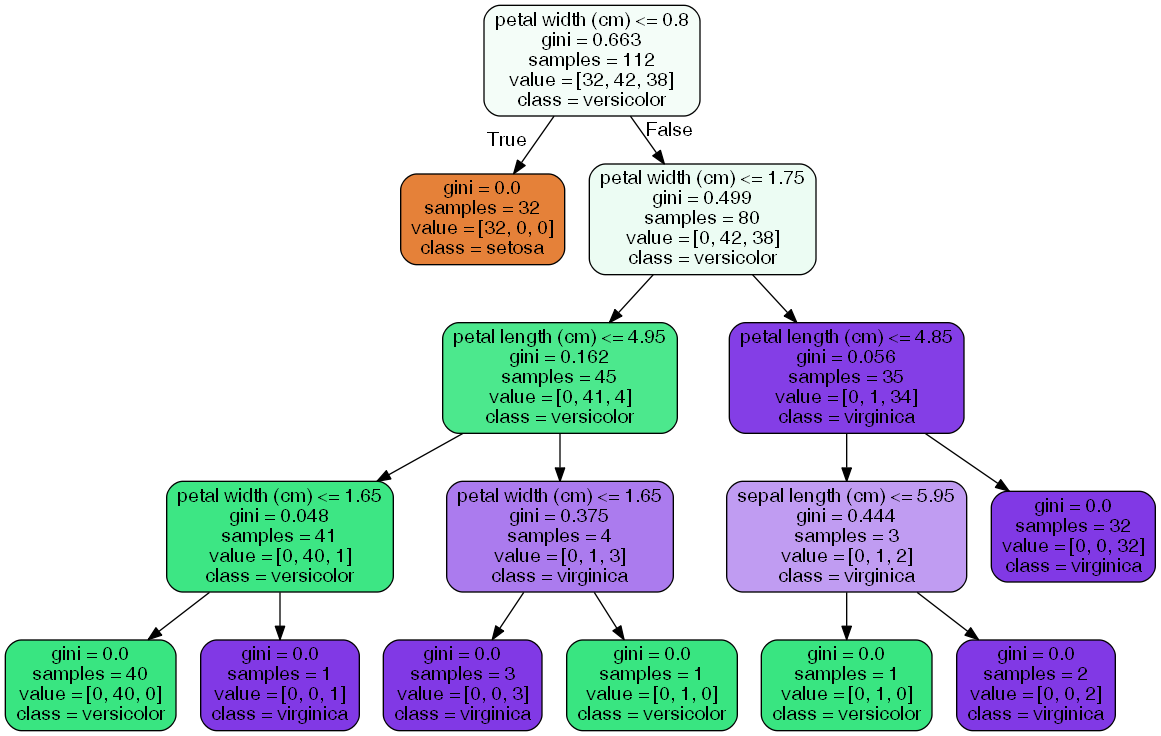

In [55]:
#安裝pydotplus    C:\Users\Administrator\Anaconda3\Scripts\pip.exe install pydotplus 
# GraphViz's executables not found錯誤 http://beanobody.blogspot.com/2017/04/graphvizs-executables-not-found.html
import os 
print(os.environ['PATH'])
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\')

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=raw_iris .target_names,
    feature_names=raw_iris .feature_names,
    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png', width=500)

In [43]:
# Day_044_建立分類器3: random_forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
iris_clf = clf.fit(X_train, y_train.values.ravel())
# 預測測試集
y_pred = clf.predict(X_test)
# 預測
print("predict:", iris_clf.predict(X_test))
# 印出預測準確率
print("score", iris_clf.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("iris.feature_names", raw_iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

predict: [2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
score 0.9473684210526315
Accuracy: 0.9473684210526315
iris.feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.03436959 0.02352723 0.44474541 0.49735777]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
# Day_046_建立分類器4: gradient_boosting_machine
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
iris_clf = clf.fit(X_train, y_train.values.ravel())
# 預測測試集
y_pred = clf.predict(X_test)
# 預測
print("predict:", iris_clf.predict(X_test))
# 印出預測準確率
print("score", iris_clf.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("iris.feature_names", raw_iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

predict: [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
score 0.9736842105263158
Accuracy: 0.9736842105263158
iris.feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.00942538 0.01722308 0.32758917 0.64576237]
